In [1]:
#  importing the ncecessary libraries

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers


from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#  Read the CIFAR 10 datasets from keras

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Bacic EDA

In [6]:
#  check the number of records

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
# number of unique classes

print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
# create a list of all class labels

class_names = ['airplane','automobile','bird','cat','deer','dog','frog',
                'horse','ship','truck']


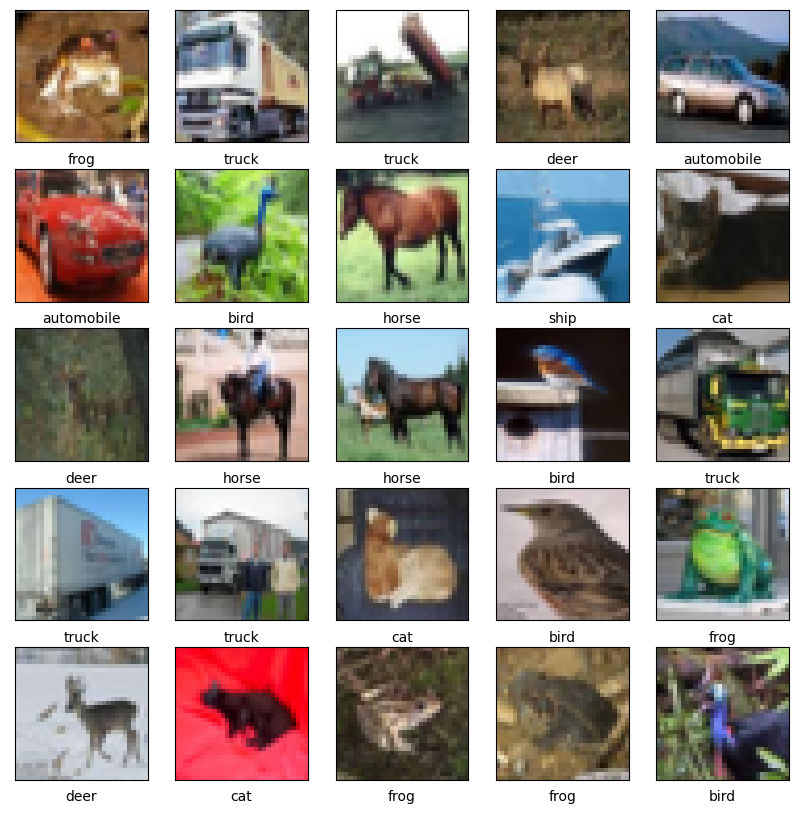

In [10]:
# visualize the sample images from the trainning images

plt.figure(figsize= [10,10])

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()
            

In [14]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [21]:
train_images[0]

array([[[ 59.,  62.,  63.],
        [ 43.,  46.,  45.],
        [ 50.,  48.,  43.],
        ...,
        [158., 132., 108.],
        [152., 125., 102.],
        [148., 124., 103.]],

       [[ 16.,  20.,  20.],
        [  0.,   0.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [123.,  88.,  55.],
        [119.,  83.,  50.],
        [122.,  87.,  57.]],

       [[ 25.,  24.,  21.],
        [ 16.,   7.,   0.],
        [ 49.,  27.,   8.],
        ...,
        [118.,  84.,  50.],
        [120.,  84.,  50.],
        [109.,  73.,  42.]],

       ...,

       [[208., 170.,  96.],
        [201., 153.,  34.],
        [198., 161.,  26.],
        ...,
        [160., 133.,  70.],
        [ 56.,  31.,   7.],
        [ 53.,  34.,  20.]],

       [[180., 139.,  96.],
        [173., 123.,  42.],
        [186., 144.,  30.],
        ...,
        [184., 148.,  94.],
        [ 97.,  62.,  34.],
        [ 83.,  53.,  34.]],

       [[177., 144., 116.],
        [168., 129.,  94.],
        [179., 1

In [22]:
# normalization 
train_images = train_images/255
test_images = test_images/255

In [23]:
train_images[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [24]:
# one hot encoding for the target classes
num_classes = 10

train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [28]:
train_labels[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
#  build the CNN model

model = Sequential()
model.add(layers.Conv2D( filters = 32,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                         data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                         use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                         kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                         kernel_constraint=None, bias_constraint=None,input_shape = (32,32,3)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters = 32,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                 data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                 use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                 kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters = 64,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                 data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                 use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                 kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(units = 128 ,activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                       bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                       activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = num_classes ,activation='softmax', use_bias=True, kernel_initializer="glorot_uniform",
                       bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                       activity_regularizer=None, kernel_constraint=None, bias_constraint=None))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                      

In [32]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'],
              loss_weights=None, weighted_metrics=None, run_eagerly=None,
              steps_per_execution=None, jit_compile=None,)


In [34]:
history = model.fit(train_images, train_labels, batch_size= 64, epochs= 5, validation_data= (test_images, test_labels))

Epoch 1/5
782/782 [==============================] - 118s 150ms/step - loss: 1.2443 - accuracy: 0.5618 - val_loss: 1.1307 - val_accuracy: 0.5981
Epoch 2/5
782/782 [==============================] - 124s 159ms/step - loss: 1.0264 - accuracy: 0.6398 - val_loss: 0.9846 - val_accuracy: 0.6615
Epoch 3/5
782/782 [==============================] - 129s 165ms/step - loss: 0.9446 - accuracy: 0.6704 - val_loss: 0.8907 - val_accuracy: 0.6911
Epoch 4/5
782/782 [==============================] - 140s 179ms/step - loss: 0.8836 - accuracy: 0.6906 - val_loss: 1.6067 - val_accuracy: 0.6060
Epoch 5/5
782/782 [==============================] - 140s 179ms/step - loss: 0.8335 - accuracy: 0.7072 - val_loss: 0.7691 - val_accuracy: 0.7304


Model Evaluation Part

- Loss Curve - Compare the Trainning loss with the testing loss over increasing epochs
- Accuracy Curve - Compare the Trainning Accuracy with the testing Accuracy over increasing epochs

Text(0.5, 1.0, 'Loss Curves')

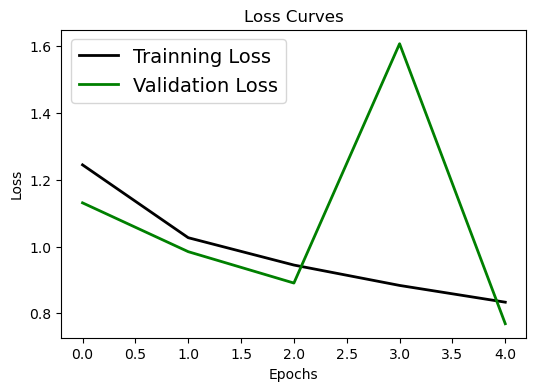

In [35]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

Text(0.5, 1.0, 'Accuracy Curves')

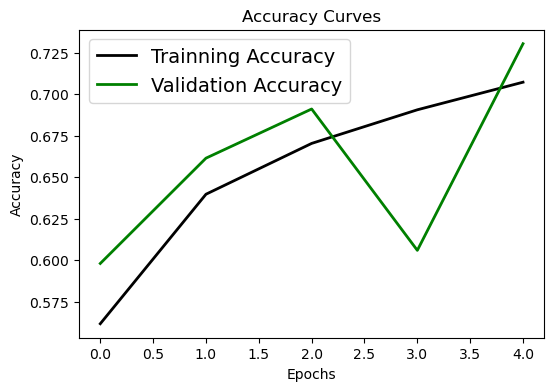

In [36]:
# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

Prediction Part

In [38]:
pred = model.predict(test_images)
print(pred)

313/313 [==============================] - 5s 15ms/step
[[1.1865399e-03 1.1007377e-03 1.4389326e-03 ... 7.1513647e-04
  2.4779510e-02 2.9533708e-03]
 [1.6098986e-03 2.1318154e-01 1.1998068e-06 ... 1.1318692e-07
  7.8415352e-01 1.0463619e-03]
 [2.2168855e-01 1.6096818e-01 5.3779962e-03 ... 1.5127332e-03
  5.3410602e-01 6.4548187e-02]
 ...
 [5.6664215e-04 6.0082406e-05 6.1022826e-02 ... 7.4301362e-02
  5.8154232e-04 4.6321613e-04]
 [2.4594858e-01 6.4584398e-01 8.7144086e-03 ... 1.1867554e-02
  1.3122812e-03 7.5462572e-03]
 [7.4343579e-06 1.7695093e-05 1.3171608e-04 ... 9.9028033e-01
  1.4618248e-06 8.8259676e-06]]


In [39]:
pred_classes = np.argmax(pred, axis = 1)
print(pred_classes)

[3 8 8 ... 5 1 7]


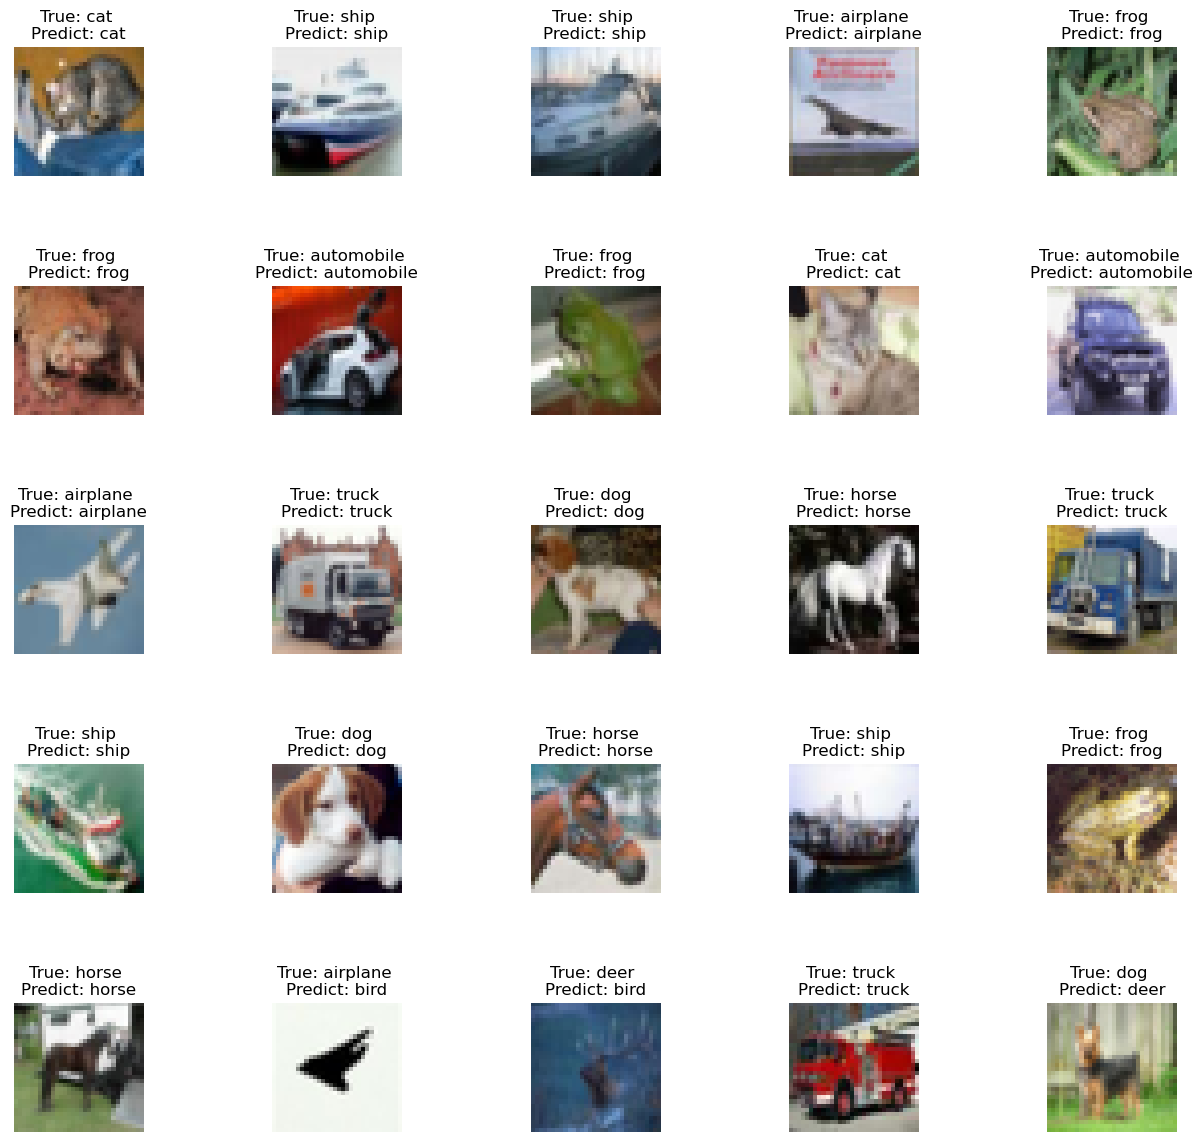

In [41]:
#  plotting the Actual vs Predicted results

fig, axes = plt.subplots(5,5, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0,25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], 
                      class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)

## Tasks

- Increse the epochs as 10, 50, 75, 100, 150 and plot the Accuracy, loss curves
- increse the Number of CONV2d layers along with low loss epoch value from first task
- Change max pooling into AVG pooling and plot the Accuracy and loss curves
